# Classification And Regression Tree (CART) from Scratch

The representation of the CART model is a binary tree. A node represents a single input variable (X) and a split point on that variable, assuming the variable is numeric. The leaf nodes of the tree contain an output variable (y) which is used to make a prediction.

Creating a binary decision tree is actually a process of dividing up the input space. A greedy approach is used to divide the space called recursive binary splitting. This is a numerical procedure where all the values are lined up and different split points are tried and tested using a cost function.

The split with the best cost (lowest cost because we minimize cost) is selected. All input variables and all possible split points are evaluated and chosen in a greedy manner based on the cost function.

* **Regression**: The cost function that is minimized to choose split points is the sum squared error across all training samples that fall within the rectangle.  
  

* **Classification**: The Gini cost function is used which provides an indication of how pure the nodes are, where node purity refers to how mixed the training data assigned to each node is.

Splitting continues until nodes contain a minimum number of training examples or a maximum tree depth is reached.

## Creating Fake Data
This implementation is for Classification task

In [1]:
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_classes=2, n_features=2, n_redundant=0, n_samples=100, random_state=51)

In [3]:
print("First 5 X:")
print(X[:5,:])
print("First 5 y")
print(y[:5])

First 5 X:
[[-0.7082671   1.35615551]
 [-1.07676796 -1.73027582]
 [-0.76631557  1.18137216]
 [ 0.62418942 -1.20790138]
 [-1.34688535  1.21043201]]
First 5 y
[0 0 0 1 0]


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set_style("dark")
sns.set_palette('prism')

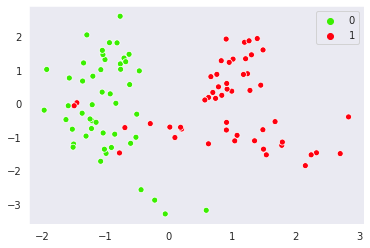

In [6]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [9]:
import numpy as np 

In [10]:
dataset = np.column_stack((X_train, y_train))
dataset[:5,:]

array([[-0.46700614,  0.97258791,  0.        ],
       [-0.62872481,  1.46890002,  0.        ],
       [ 0.20093873, -0.76498047,  1.        ],
       [-1.22178935, -0.75093565,  0.        ],
       [ 1.78114569, -1.25290815,  1.        ]])

## Gini Index
The Gini index is the name of the cost function used to evaluate splits in the dataset.

A Gini score gives an idea of how good a split is by how mixed the classes are in the two groups created by the split. A perfect separation results in a Gini score of 0, whereas the worst case split that results in 50/50 classes in each group result in a Gini score of 0.5 in binary classification.
#### $Gini = 1 - \sum\limits_{i = 1}^{c}(p_i)^2$ , where p is the proportion $\frac{Number\space of\space rows \space of\space class\space C}{Total\space number\space of\space Rows}$
The Gini index for each group must then be weighted by the size of the group, relative to all of the samples in the parent,
####  $Gini = \sum\limits_{g = 1}^{G}((1 - \sum\limits_{i = 1}^{c}(p_i)^2)\times \frac{Group_g\space Size}{Total\space Samples})$ 

In [11]:
def gini_index(groups, classes):
    n_instances = sum([len(group) for group in groups])
    gini = 0
    for group in groups:
        size = len(group)
        if size == 0:
            continue
        score = 0
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val)/size
            score += p*p
        gini += (1-score)*size/n_instances
    return gini

In [12]:
# Test function gini_index
print(gini_index([[[2, 1,0],[5, 6,0]],[[2.2, 5,1],[6.6, -4.4,1]]], [0,1]))
print(gini_index([[[1,0],[1,1]],[[1,0],[1,1]]], [0,1]))

0.0
0.5


## Create Split
Creating a split consists of two parts:

### 1) Splitting a Dataset
Splitting a dataset means separating a dataset into two lists of rows given the index of an attribute and a split value for that attribute. Once we have the two groups, we can then use our Gini score above to evaluate the cost of the split.

In [13]:
def test_split(index, value, dataset):
    left, right = [], []
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right

### 2) Evaluating all Splits
Given a dataset, we must check every value on each attribute as a candidate split, evaluate the cost of the split and find the best possible split we could make. Once the best split is found, we can use it as a node in our decision tree.

In [14]:
class CartNode:
    def __init__(self, index, value, groups):
        self.index = index
        self.value = value
        self.groups = groups
        self.left = None
        self.right = None

In [15]:
def get_split(dataset, log=False):
    classes = list(set(row[-1] for row in dataset))
    b_index, b_value, b_score, b_groups = -1, 0, 1, None
    for index in range(len(dataset[0])-1):
        for row in dataset:
            groups = test_split(index, row[index], dataset)
            gini = gini_index(groups, classes)
            if log:
                print('X%d < %.3f Gini=%.3f' % ((index), row[index], gini))
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], gini, groups
    return CartNode(b_index, b_value, b_groups)

X0 < -0.467 Gini=0.400
X0 < -0.629 Gini=0.476
X0 < 0.201 Gini=0.171
X0 < -1.222 Gini=0.400
X0 < 1.781 Gini=0.400
X0 < -1.495 Gini=0.480
X0 < -0.604 Gini=0.450
X0 < -0.938 Gini=0.475
X0 < 1.210 Gini=0.300
X0 < -0.058 Gini=0.317
X1 < 0.973 Gini=0.450
X1 < 1.469 Gini=0.400
X1 < -0.765 Gini=0.476
X1 < -0.751 Gini=0.467
X1 < -1.253 Gini=0.444
X1 < -0.070 Gini=0.480
X1 < -1.193 Gini=0.475
X1 < 1.816 Gini=0.444
X1 < 1.336 Gini=0.476
X1 < -3.304 Gini=0.480

Best split: X0 < 0.201


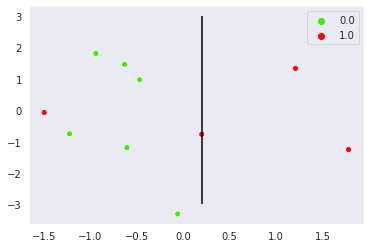

In [16]:
# Testing get_split function
node = get_split(dataset[:10, :], log=True)
print("\nBest split: X%d < %.3f"%(node.index, node.value))
sns.scatterplot(x=dataset[:10,0], y=dataset[:10,1], hue = dataset[:10,2])
plt.vlines(x=node.value, ymin = -3, ymax=3)

## Build a Tree
Building a tree may be divided into 3 main parts:
### 1) Terminal Nodes
We need to decide when to stop growing a tree. We can do that using the depth and the number of rows that the node is responsible for in the training dataset.
* **Maximum Tree Depth**: This is the maximum number of nodes from the root node of the tree. Once a maximum depth of the tree is met, we must stop splitting adding new nodes. Deeper trees are more complex and are more likely to overfit the training data.
* **Minimum Node Records**: This is the minimum number of training patterns that a given node is responsible for. Once at or below this minimum, we must stop splitting and adding new nodes. Nodes that account for too few training patterns are expected to be too specific and are likely to overfit the training data.

In [17]:
def to_terminal(group):
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key=outcomes.count)

### 2) Recursive Splitting
Building a decision tree involves calling the above **get_split()** function over and over again on the groups created for each node.

In [18]:
def split(node, max_depth, min_size, depth):
    left, right = node.groups
    # check for a no split
    if not left or not right:
        node.left = node.right = to_terminal(left + right)
        return
    # check for max depth
    if depth >= max_depth:
        node.left, node.right = to_terminal(left), to_terminal(right)
        return
    # process left child
    if len(left) <= min_size:
        node.left = to_terminal(left)
    else:
        node.left = get_split(left)
        split(node.left, max_depth, min_size, depth+1)
    # process right child
    if len(right) <= min_size:
        node.right = to_terminal(right)
    else:
        node.right = get_split(right)
        split(node.right, max_depth, min_size, depth+1)

### 3) Build a Tree
Building the tree involves creating the root node and calling the split() function that then calls itself recursively to build out the whole tree.

In [19]:
def build_tree(train, max_depth, min_size):
    root = get_split(train)
    split(root, max_depth, min_size, 1)
    return root

In [20]:
def print_tree(node, depth=0):
    if isinstance(node, CartNode):
        print('%s[X%d < %.3f]' % ((depth*' ', (node.index), node.value)))
        print_tree(node.left, depth+1)
        print_tree(node.right, depth+1)
    else:
        print('%s[%s]' % ((depth*' ', node)))

In [21]:
tree = build_tree(dataset, 2, 1)
print_tree(tree)

[X0 < 0.015]
 [X0 < -1.308]
  [0.0]
  [0.0]
 [X1 < -1.861]
  [0.0]
  [1.0]


## Make Prediction

In [22]:
def predict(node, row):
    if row[node.index] < node.value:
        if isinstance(node.left, CartNode):
            return predict(node.left, row)
        else:
            return node.left
    else:
        if isinstance(node.right, CartNode):
            return predict(node.right, row)
        else:
            return node.right

In [23]:
pred = [predict(tree, row) for row in X_test]

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[18  0]
 [ 2 10]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       1.00      0.83      0.91        12

    accuracy                           0.93        30
   macro avg       0.95      0.92      0.93        30
weighted avg       0.94      0.93      0.93        30

